In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [50]:
df= pd.read_csv("datasets/Mall_Customers.csv")

In [51]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [52]:
x = df.iloc[:,[3,4]]

In [53]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


##### Visualize

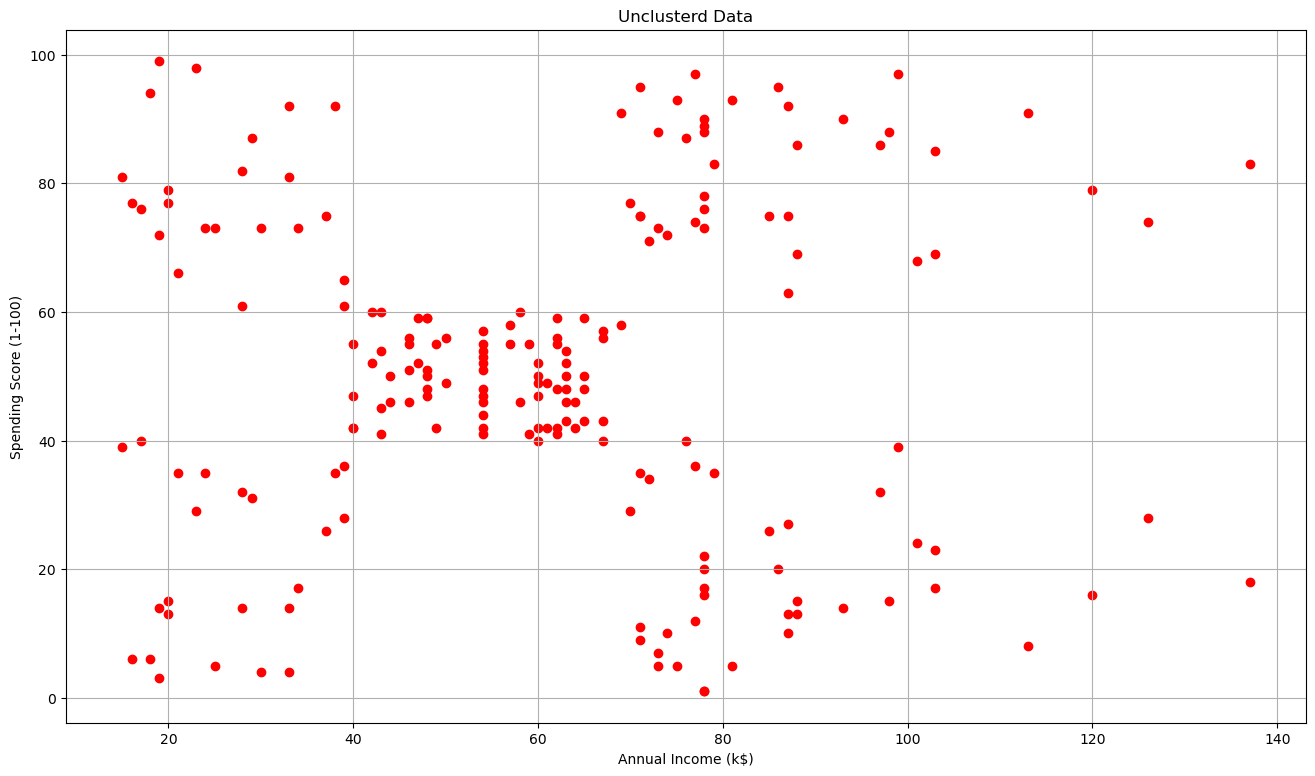

In [54]:

plt.figure(figsize=(16,9)) 
plt.title("Unclusterd Data")
plt.grid()
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.scatter(x.iloc[:,0] , x.iloc[:,1], color ="red",marker = "o")


##### Elbow Method

In [55]:
from sklearn.cluster import KMeans

In [56]:
km = KMeans(random_state = 0 , n_clusters= 5)

In [57]:
km.fit(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [58]:
km.inertia_               #Sum Squared error

44448.45544793371

In [59]:
km.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [60]:
sse = []

for k in range(1,16):
    km = KMeans(random_state = 0 , n_clusters= k , n_init=10)
    
    km.fit(x)
    sse.append(km.inertia_)
    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [63]:
sse

[269981.28,
 181363.595959596,
 106348.3730621112,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30259.65720728547,
 25095.703209997544,
 21830.041978049434,
 20736.67993892412,
 17702.595932296277,
 15810.838613705502,
 14763.330402558206,
 13165.329070181626,
 12064.939000692291]

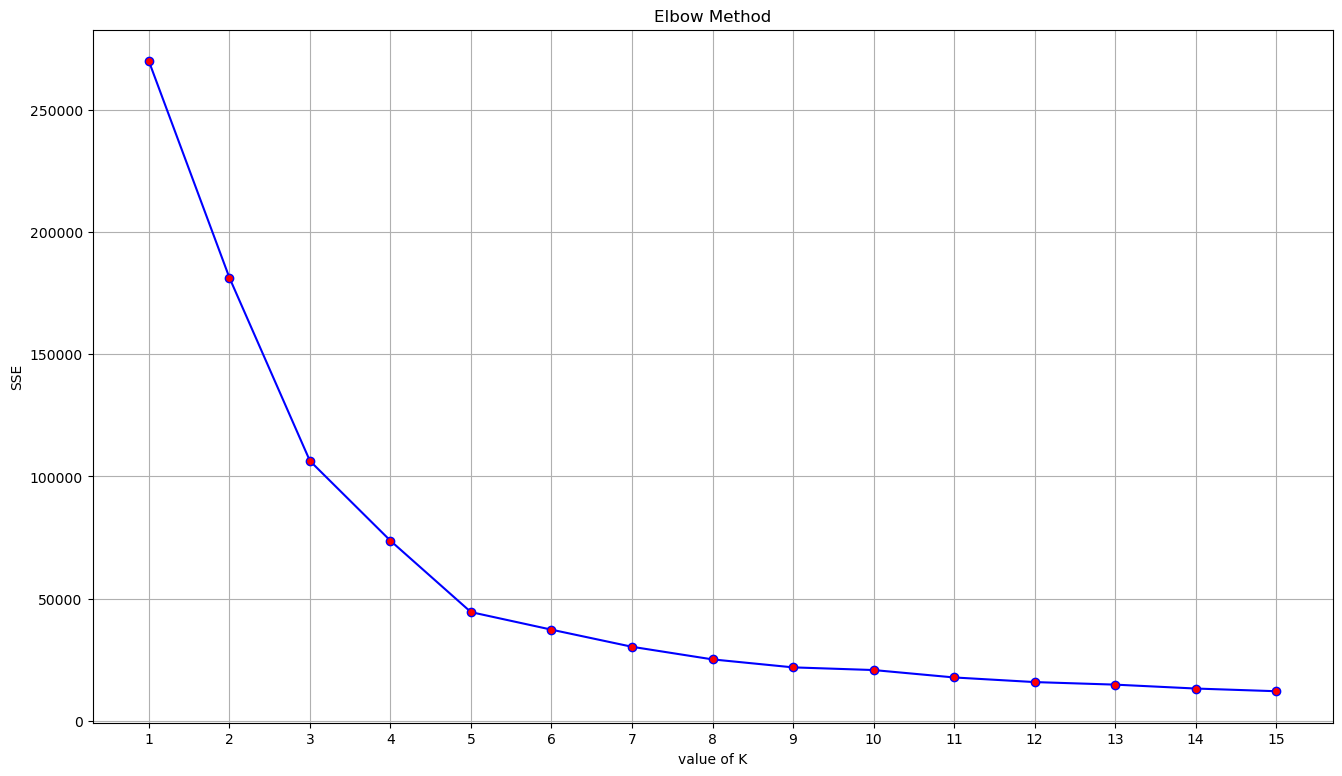

In [64]:
plt.figure(figsize=(16,9))
plt.title("Elbow Method")
plt.grid()
plt.xlabel("value of K")
plt.ylabel("SSE")
plt.xticks(range(1,16))
plt.plot(range(1,16),sse, color ="blue" ,marker= "o" , mfc ="red")

In [65]:
pip install kneed

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [66]:
from kneed import KneeLocator

In [67]:
kl = KneeLocator(range(1,16),sse,curve ="convex",direction ="decreasing")

In [68]:
kl.elbow

5

##### Silhouette Score

In [69]:
from sklearn.metrics import silhouette_score

In [86]:
silh = []

for k in range(2,16):
    km = KMeans(random_state = 0 , n_clusters= k , n_init=10)
    
    km.fit(x)
    score = silhouette_score(x, km.labels_)
    silh.append(score)
    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [84]:
silh

[181363.595959596,
 106348.3730621112,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30259.65720728547,
 25095.703209997544,
 21830.041978049434,
 20736.67993892412,
 17702.595932296277,
 15810.838613705502,
 14763.330402558206,
 13165.329070181626,
 12064.939000692291]

<BarContainer object of 14 artists>

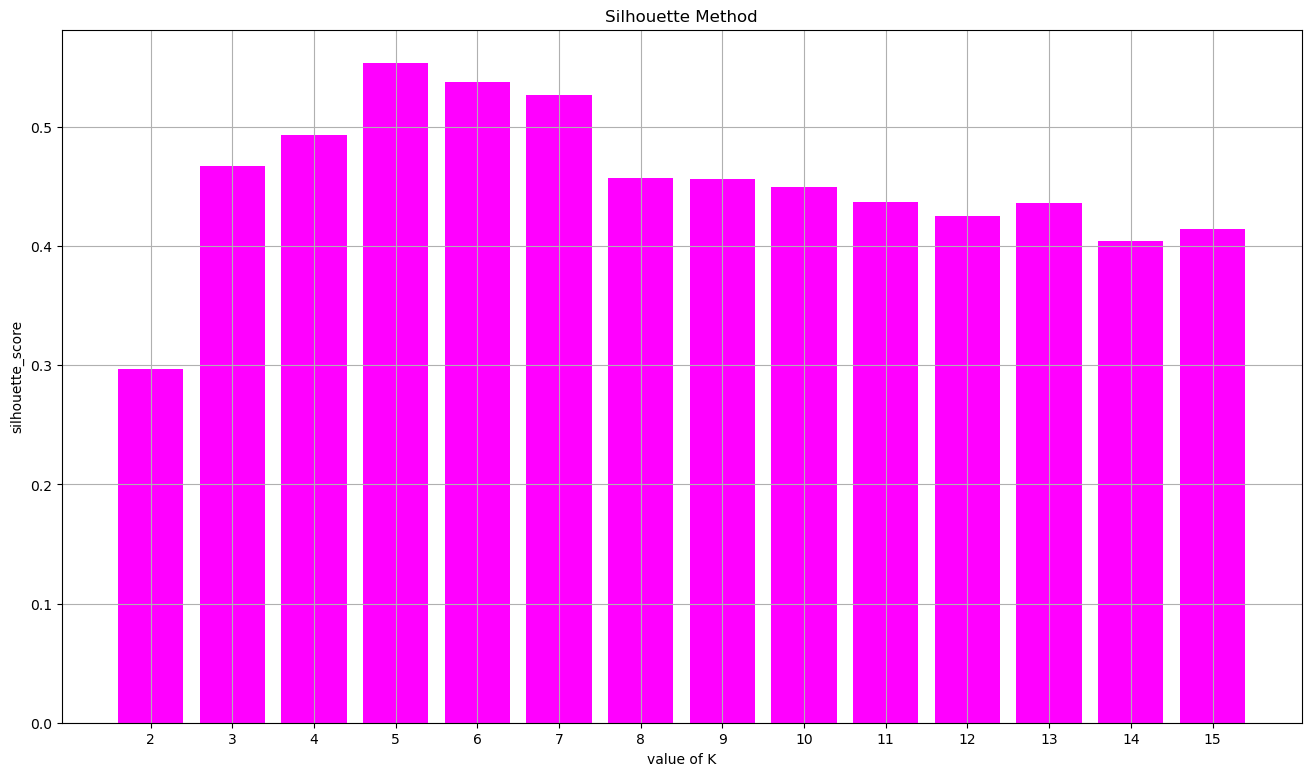

In [87]:
plt.figure(figsize=(16,9))
plt.title("Silhouette Method")
plt.grid()
plt.xlabel("value of K")
plt.ylabel("silhouette_score")
plt.xticks(range(2,16))
plt.bar(range(2,16),silh,color ="magenta") 

In [88]:
 km = KMeans(random_state = 0 , n_clusters= 5 , n_init=10)

In [89]:
y = km.fit_predict(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [90]:
cent = km.cluster_centers_
cent

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

##### Visualized The Cluster data

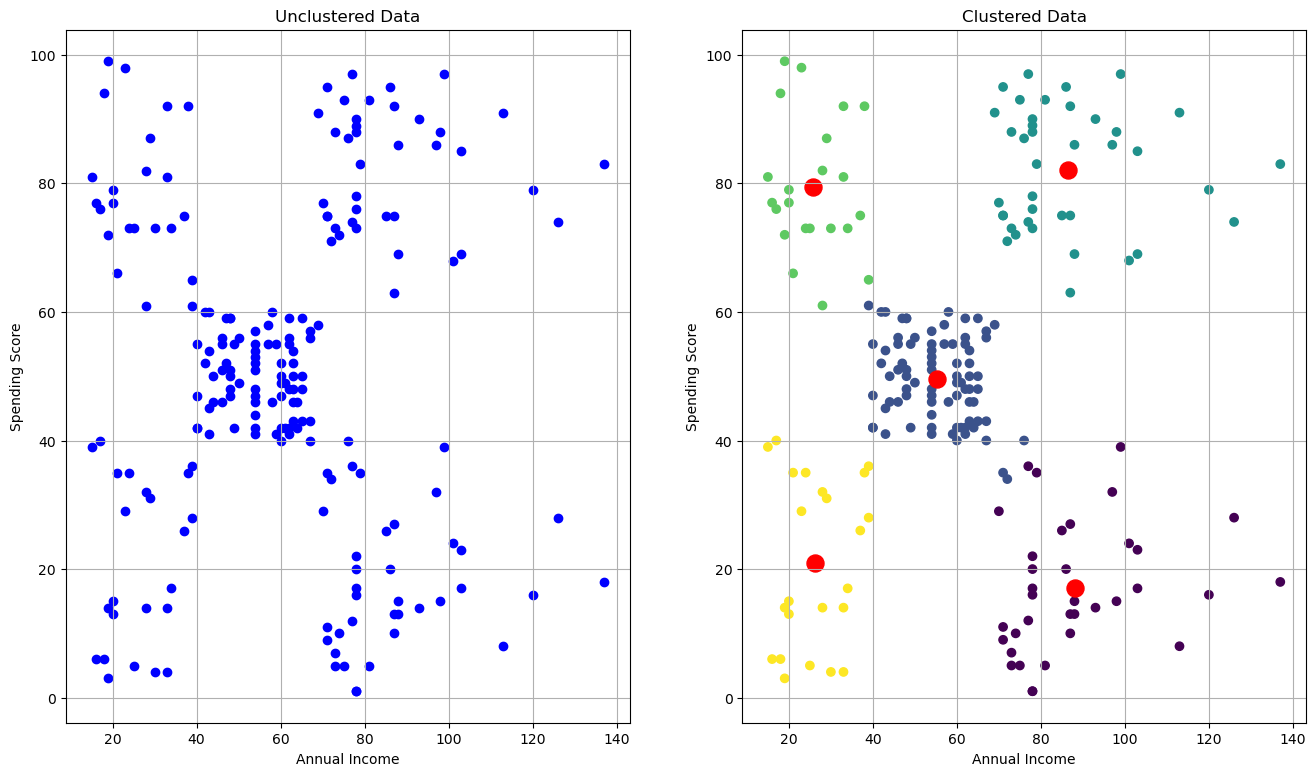

In [99]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title("Unclustered Data")
plt.grid()
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

plt.scatter(x.iloc[:,0],x.iloc[:,1],color ="b",marker="o") 


plt.subplot(1,2,2)
plt.title("Clustered Data")
plt.grid()
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x.iloc[:,0],x.iloc[:,1],c =y,marker="o") 
plt.scatter(cent[:,0], cent[:,1], color ="red", s=150) 

##### Filter The cluster

In [104]:
zero = df[y==0]
zero.shape

(35, 5)

In [105]:
one = df[y==1]
two = df[y==2]
three = df[y==3]
four = df[y==4]

one.shape, two.shape,three.shape,four.shape

((81, 5), (39, 5), (22, 5), (23, 5))

In [106]:
four.to_csv("cluster-four.csv" , index = False)

In [111]:
df["label"] = y        #1 new column is added.

In [112]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


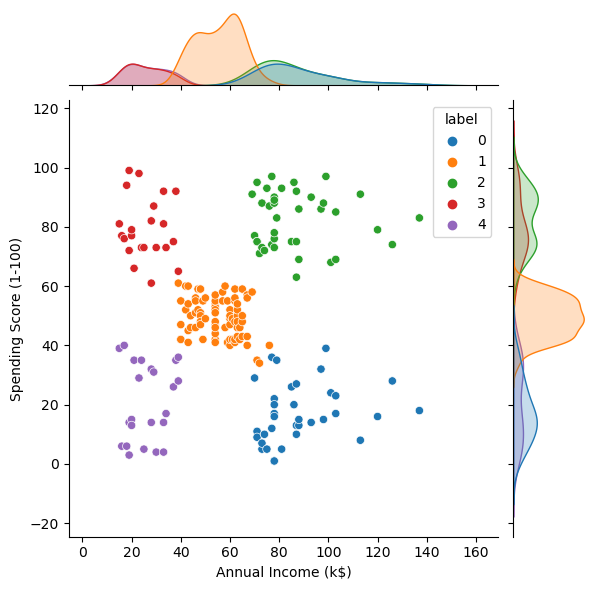

In [114]:
sns.jointplot(x="Annual Income (k$)" ,y="Spending Score (1-100)" , data = df , hue = "label" ,palette = "tab10")

##### Predict on Unknown Data

In [116]:
new = pd.DataFrame(data=[[56,78],[121,79],[93,56],[45,41],[77,66],[23,30]], columns= x.columns)

In [117]:
new

,Annual Income (k$),Spending Score (1-100)
0,56,78
1,121,79
2,93,56
3,45,41
4,77,66
5,23,30


In [120]:
km.predict(new)

array([1, 2, 2, 1, 2, 4])